### <div align="center">Neural Networks: Training</div>

##### 5.1: Training though Backpropagation
- Below are the 5 steps for Neural Network Training:
  1. Initialize neural network with random weights
  2. Feed forward training samples and calculate prediction error
  3. Back propagate error to adjust weights using gradient descent
  4. Repeat the process until certain number of iterations (epochs) or error is reduced significantly
  5. Evaluate Neural Network Performance by using test or validation set
- For training a neural network, we use a supervised training dataset. Feed samples one by one, calculate error and then backpropagate it to adjust weights.
- The main objective of training is to find out the right weights for the neural network. It is like adjusting knobs on a sound board to get the expected audio output.
- Error backpropagation uses partial derivatives to measure how much a specific weight contributes to an error. Based on that, adjustments are made to reduce the error in the next iteration.
- One epoch is feeding all the records in your dataset through the network once during a training process.
- MSE (Mean Squared Error) is one of the many cost functions used to measure error.

##### 5.2: Gradient Descent: Theoratical
- Gradient Descent is a technique used in neural networks and statistical ML algorithms to find the optimal value of weights that results in minimal prediction error. That optimal point is also known as the global minimum.
- It uses the gradient (or partial derivative) of error with respect to weights to perform weight adjustment.
- Learning rate is a hyperparameter that we need to supply in gradient descent.

##### 5.3: Gradient Descent: PyTorch Implementation

For employee's bonus dataset, implement gradient descent in PyTorch to find optimal values of weights that decides the bonus amount.

𝑏𝑜𝑛𝑢𝑠 = 𝜔_1∗𝑝𝑒𝑟𝑓𝑜𝑟𝑚𝑎𝑛𝑐𝑒+𝜔_2∗𝑒𝑥𝑝𝑒𝑟𝑖𝑒𝑛𝑐𝑒+𝜔_3∗𝑝𝑟𝑜𝑗𝑒𝑐𝑡𝑠_𝑐𝑜𝑚𝑝𝑙𝑒𝑡𝑒𝑑+ 𝑏

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import torch

In [6]:
# Step 1: Read the dataset from the CSV file
df = pd.read_csv('../../data/bonus_dataset.csv')
df.head()

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178
3,EMP_004,5,7,8,138
4,EMP_005,7,8,9,170


In [7]:
df.shape

(100, 5)

In [8]:
# Extract features and target from the DataFrame
performance = torch.tensor(df['performance'].values, dtype=torch.float32)
years_of_experience = torch.tensor(df['years_of_experience'].values, dtype=torch.float32)
projects_completed = torch.tensor(df['projects_completed'].values, dtype=torch.float32)
bonus = torch.tensor(df['bonus'].values, dtype=torch.float32)

##### Batch Gradient Descent

In [9]:
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)
 
w1, w2, w3, bias

(tensor([0.6720], requires_grad=True),
 tensor([0.4200], requires_grad=True),
 tensor([0.8650], requires_grad=True),
 tensor([0.9520], requires_grad=True))

In [10]:
# Learning rate and number of iterations
learning_rate = 0.006
epochs = 5000
# Lists to store the loss at each epoch
loss_history = []

# Step 3: Training loop for gradient descent
for epoch in range(epochs):
    # Compute the predicted bonus using the current weights and bias
    predicted_bonus = w1 * performance + w2 * years_of_experience + w3 * projects_completed + bias
    
    # Compute the Mean Squared Error (MSE) loss
    loss = ((predicted_bonus - bonus) ** 2).mean()
    loss_history.append(loss.item())
    
    # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
    loss.backward()
    
    # Update the weights and bias using the computed gradients
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        bias -= learning_rate * bias.grad

    # Zero the gradients after updating
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/5000], Loss: 17.0732
Epoch [200/5000], Loss: 14.8858
Epoch [300/5000], Loss: 12.9872
Epoch [400/5000], Loss: 11.3333
Epoch [500/5000], Loss: 9.8907
Epoch [600/5000], Loss: 8.6320
Epoch [700/5000], Loss: 7.5335
Epoch [800/5000], Loss: 6.5748
Epoch [900/5000], Loss: 5.7381
Epoch [1000/5000], Loss: 5.0079
Epoch [1100/5000], Loss: 4.3706
Epoch [1200/5000], Loss: 3.8144
Epoch [1300/5000], Loss: 3.3290
Epoch [1400/5000], Loss: 2.9054
Epoch [1500/5000], Loss: 2.5357
Epoch [1600/5000], Loss: 2.2130
Epoch [1700/5000], Loss: 1.9314
Epoch [1800/5000], Loss: 1.6856
Epoch [1900/5000], Loss: 1.4711
Epoch [2000/5000], Loss: 1.2839
Epoch [2100/5000], Loss: 1.1205
Epoch [2200/5000], Loss: 0.9779
Epoch [2300/5000], Loss: 0.8535
Epoch [2400/5000], Loss: 0.7449
Epoch [2500/5000], Loss: 0.6501
Epoch [2600/5000], Loss: 0.5673
Epoch [2700/5000], Loss: 0.4951
Epoch [2800/5000], Loss: 0.4321
Epoch [2900/5000], Loss: 0.3771
Epoch [3000/5000], Loss: 0.3292
Epoch [3100/5000], Loss: 0.2873
Epoch [3200/5

In [11]:
# Step 4: Print the learned weights and bias
print(f"\nLearned weights and bias:")
print(f"w1: {w1.item():.2f}, w2: {w2.item():.2f}, w3: {w3.item():.2f}, bias: {bias.item():.2f}")


Learned weights and bias:
w1: 12.03, w2: 5.91, w3: 2.12, bias: 19.40


In [12]:
# predicted_bonus = w1 * performance + w2 * years_of_experience + w3 * projects_completed + bias
predicted_bonus = w1 * 7 + w2 * 4 + w3 * 7 + bias
predicted_bonus

tensor([142.0793], grad_fn=<AddBackward0>)

#### Unable to plot data due to lack of resources

In [2]:
def plot_loss(epochs, loss_history, title):
    # Plotting the error over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_history, color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()

In [ ]:
plot_loss(range(1000, 2000), loss_history[1000:2000], "Error Reduction over Iterations (Batch Gradient Descent)")

#### 5.4: Batch Gradient Descent Vs Mini Batch GD Vs Stochastic GD (SGD)
- `Batch Gradient Descent` is an optimization algorithm that updates model parameters by calculating gradients across the entire dataset in each iteration to minimize a loss function.
- `Mini Batch Gradient Descent` is a variant of batch gradient descent that updates model parameters by calculating gradients using a small subset of the dataset, balancing efficiency and stability.
- `Stochastic Gradient Descent` updates model parameters using the gradient calculated from a single, random data point per iteration. This adds noise but speeds up convergence.
- Difference GD Vs Mini GD Vs SGD

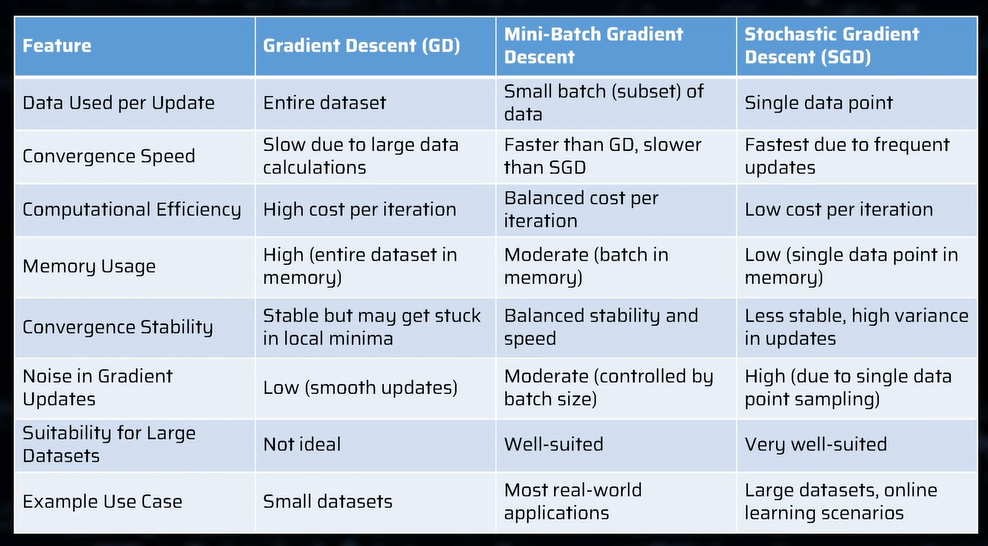

#### Mini Batch GD

In [14]:
# Parameters for Mini-Batch Gradient Descent
learning_rate = 0.001
epochs = 5000
batch_size = 16  # Define the batch size

# Number of samples
n_samples = len(performance)

loss_history = []

# Training loop for mini-batch gradient descent
for epoch in range(epochs):
    for i in range(0, n_samples, batch_size):
        # Select the mini-batch
        batch_performance = performance[i:i + batch_size]
        batch_years_of_experience = years_of_experience[i:i + batch_size]
        batch_projects_completed = projects_completed[i:i + batch_size]
        batch_bonus = bonus[i:i + batch_size]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * batch_performance + w2 * batch_years_of_experience + w3 * batch_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss
        loss = ((predicted_bonus - batch_bonus) ** 2).mean()
        loss_history.append(loss.item())
        
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/5000], Loss: 0.0139
Epoch [200/5000], Loss: 0.0115
Epoch [300/5000], Loss: 0.0097
Epoch [400/5000], Loss: 0.0082
Epoch [500/5000], Loss: 0.0070
Epoch [600/5000], Loss: 0.0060
Epoch [700/5000], Loss: 0.0051
Epoch [800/5000], Loss: 0.0044
Epoch [900/5000], Loss: 0.0038
Epoch [1000/5000], Loss: 0.0032
Epoch [1100/5000], Loss: 0.0028
Epoch [1200/5000], Loss: 0.0024
Epoch [1300/5000], Loss: 0.0020
Epoch [1400/5000], Loss: 0.0017
Epoch [1500/5000], Loss: 0.0015
Epoch [1600/5000], Loss: 0.0013
Epoch [1700/5000], Loss: 0.0011
Epoch [1800/5000], Loss: 0.0009
Epoch [1900/5000], Loss: 0.0008
Epoch [2000/5000], Loss: 0.0007
Epoch [2100/5000], Loss: 0.0006
Epoch [2200/5000], Loss: 0.0005
Epoch [2300/5000], Loss: 0.0004
Epoch [2400/5000], Loss: 0.0004
Epoch [2500/5000], Loss: 0.0003
Epoch [2600/5000], Loss: 0.0003
Epoch [2700/5000], Loss: 0.0002
Epoch [2800/5000], Loss: 0.0002
Epoch [2900/5000], Loss: 0.0002
Epoch [3000/5000], Loss: 0.0001
Epoch [3100/5000], Loss: 0.0001
Epoch [3200/5000]

In [15]:
len(loss_history)

35000

In [ ]:
plot_loss(range(10000,10300), loss_history[10000:10300], "Error Reduction over Epochs (Mini Gradient Descent)")

#### Stochastic Gradient Descent

In [16]:
# Parameters for Stochastic Gradient Descent
learning_rate = 0.001
epochs = 500

# Number of samples
n_samples = len(performance)

loss_history = []

# Training loop for stochastic gradient descent
for epoch in range(epochs):
    for i in range(n_samples):
        # Select a single data point
        single_performance = performance[i]
        single_years_of_experience = years_of_experience[i]
        single_projects_completed = projects_completed[i]
        single_bonus = bonus[i]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * single_performance + w2 * single_years_of_experience + w3 * single_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss for this data point
        loss = (predicted_bonus - single_bonus) ** 2
        
        if i%10==0:
            loss_history.append(loss.item())
        
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/500], Loss: 0.0000
Epoch [200/500], Loss: 0.0000
Epoch [300/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0000
Learned weights: w1 = 12.0000, w2 = 5.9999, w3 = 2.0001
Learned bias: 19.9993


In [17]:
len(loss_history)

5000

In [ ]:
plot_loss(range(1000,1300), loss_history[1000:1300], "Error Reduction over Iterations (SGD)")

### MCQ:
1. What does the backpropagation process primarily adjust in a neural network?
- The weights of the network based on error gradients
2. What is the role of the learning rate in gradient descent?
- It controls how much the weights adjust with each update